# DS 3000 Quiz 3

Due by: Monday Nov 14 @ 11:59 PM EST

Time Limit: You have 2 hours to complete the assignment once started

## Instructions

This quiz has 100 points total.

- You are welcome to post a private note on piazza, but to keep a consistent testing environment for all students we are unlikely to provide assistance.
- You may not contact other students with information about this this quiz
    - even saying "it was easy/hard" in a general sense can introduce a bias in favor of students who take the quiz earlier or later
- Under no circumstances should you share a copy of this quiz with anyone who isn't a member of the course staff.
- Take this quiz with open notes and feel free to access any online resource / documentation you'd like.  

### Submission Instructions
After completing the quiz below, please follow the instructions below to submit:
1. "Kernel" -> "Restart & Run All"
1. save your quiz file to this latest version
1. upload the `.ipynb` to gradescope **before** clicking submit
1. ensure that you can see your jupyter notebook in the gradescope interface after clicking "submit"

We specify the last note above as gradescope has allowed students to "submit" without uploading a file.  It is your responsibility to ensure that you've actually submitted a file.

### Academic Integrity Pledge

Input your name below to sign the Academic Integrity Pledge before continuing with the quiz. Failure to do so will result in a score of **0**.

In [1]:
name = 'Student Name Here'
print(f'I, {name}, declare that the following work is entirely my own, and that I did not copy or seek help from any students who have currently or previously taken this course, nor from any online source other than private messages between myself and the professor on Piazza/via email.')

I, Student Name Here, declare that the following work is entirely my own, and that I did not copy or seek help from any students who have currently or previously taken this course, nor from any online source other than private messages between myself and the professor on Piazza/via email.


In [2]:
# the following modules will be necessary to complete the quiz
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from copy import copy
from collections import Counter
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Part 1: k-Nearest Neighbors (30 points; 10 points each)

For this problem you will use the `new_fifa23.csv` file (available in the Quiz module on Canvas). It is a slightly altered of the FIFA players data set you have used previously. We will use these data to see if we can predict a football player's Position (Backfield, Forward, Goalkeeper, Midfield, Wing) based on all the numeric features in the data.

In [3]:
df_fifa = pd.read_csv('new_fifa23.csv')
df_fifa.head()

,FullName,PositionRole,Age,Height,Weight,Overall,Potential,ValueEUR,WageEUR,IntReputation,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,Karim Benzema,Forward,34,185,81,91,91,64000000,450000,4,...,89,84,89,67,67,67,63,58,63,21
1,Lionel Messi,Midfield,35,169,67,91,91,54000000,195000,5,...,91,88,91,67,66,67,62,53,62,22
2,Kylian Mbappé,Forward,23,182,73,91,95,190500000,230000,4,...,92,84,92,70,66,70,66,57,66,21
3,Kevin De Bruyne,Midfield,31,181,70,91,91,107500000,350000,4,...,91,91,91,82,82,82,78,72,78,24
4,Robert Lewandowski,Forward,33,185,81,91,91,84000000,420000,5,...,86,83,86,67,69,67,64,63,64,22


**NOTE**: You are not expected to write all the code for this problem. To save time, you may take code from the lecture notes/homework and adapt it appropriately. If you do, please be careful to make sure you are adequately adapting the code to this problem, and **MAKE SURE TO COMMENT**.

## Part 1.1: Fit a Cross Validated k-NN

Use 5-fold cross validation to fit and predict the `PositionRole` of the players in the data set. Use the $k=6$ nearest neighbors (for this data set, more $k$ is better, but after $k=6$ the improvement is negligible). Do not forget to scale normalize your all x-features (there are many features which are on different scales). To help you get started, you can get the feature names with:

```python
x_feat_list = list(df_fifa.columns[2:])
y_feat = 'PositionRole'
```

$\color{red}{\text{Solution:}}$

In [4]:
k = 6 # the k-nearest neighbors
x_feat_list = list(df_fifa.columns[2:])
y_feat = 'PositionRole'

# scale normalization (overwrites old data)
for feat in x_feat_list:
    df_fifa[feat] = df_fifa[feat] / df_fifa[feat].std()

# extract data into numpy format (for sklearn)
x = df_fifa.loc[:, x_feat_list].values
y_true = df_fifa.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
kfold = StratifiedKFold(n_splits=5) # the k-folds

# allocate an empty array to store predictions in
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each pokemon's maintype
    y_pred[test_idx] = knn_classifier.predict(x_test)

## Part 1.2: Confusion Matrix and Overall Accuracy

Make a confusion matrix using the `y_true` values and the `y_pred` values from the 5-fold cross validation in the previous part. Then, use the `accuracy_score()` function to calculate the overall accuracy of the k-NN classifier.

$\color{red}{\text{Solution:}}$

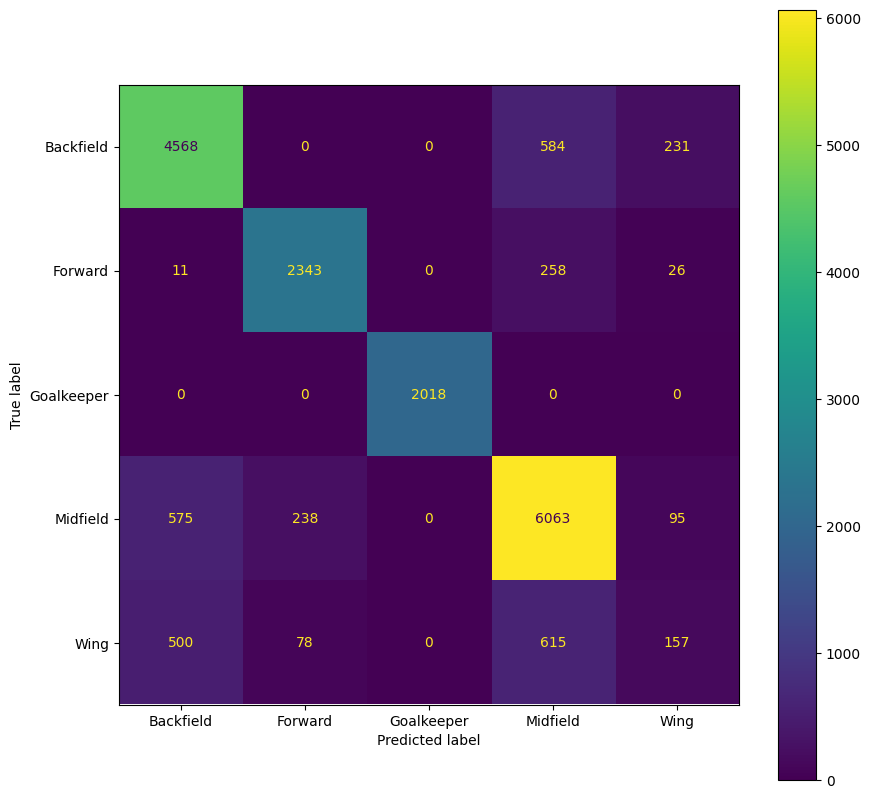

In [5]:
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(10, 10)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

In [6]:
accuracy_score(y_true, y_pred)

0.8251089324618737

## Part 1.3: Discuss

In a markdown cell, provide a discussion (at least one paragraph) of the results of the k-NN classifier. Be sure to discuss:
- What the overall accuracy tells us
- Which positions were predicted well
- Which positions were not predicted well
- Why some were predicted well and others weren't (you do not necessarily have to have an understanding of soccer to do this, but it may help to [read a bit about it](https://en.wikipedia.org/wiki/Association_football_positions): note that some intuition can be gained simply by looking at the table of contents of that wikipedia page)

$\color{red}{\text{Solution:}}$

The overall accuracy is pretty good, indicating the k-NN does a decent job of predicting player position as a whole. However, not all positions are predicted at the same accuracy. Goalkeepers are predicted perfectly; this makes sense as their role is completely different from all other players. Forwards and Backfield players are generally easy to distinguish, which also makes sense. Wing players are not predicted well at all. This is likely because there are some wings who play forward, some who play in the middle of the field, and some who play back.

## Part 2: Decision Trees (30 points; 6 points each part)

Load the `ratemyprof_sample.csv` (available in the Quiz module on Canvas). These data consist of randomly selected ratings from RateMyProfessor.com, and are adapted from the dataset available at [this site](https://data.mendeley.com/datasets/fvtfjyvw7d/2). You will use these data in Parts 2 and 3 to build Decision Trees and a Random Forest.

Our goal is to predict if a student would take a professor again (the `would_take_agains` feature is our output) with the rest of the features which include:
- `student_difficult`: 1 to 5 rating of how difficult the student found the professor (5 being the most difficult)
- `attence`: whether attendance was mandatory for the professor's class
- `gives_good_feedback` to `IsCourseOnline`: True/False features coded as 0 (False) or 1 (True) representing how students felt about the professor/class. Most are easily interpretable; if more information is required about a specific feature, please see the source website above.

In [7]:
df_rmp = pd.read_csv("ratemyprof_sample.csv")
df_rmp.head()

,would_take_agains,student_difficult,attence,gives_good_feedback,caring,respected,participation_matters,clear_grading_criteria,skip_class,amazing_lectures,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Yes,3,True,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Yes,2,False,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Yes,2,True,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
3,Yes,3,True,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
4,Yes,2,True,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0


In [8]:
Counter(df_rmp['would_take_agains'])

Counter({'Yes': 1183, 'No': 406})

**NOTE**: You are not expected to write all the code for this problem. To save time, you may take code from the lecture notes/homework and adapt it appropriately. If you do, please be careful to make sure you are adequately adapting the code to this problem, and **MAKE SURE TO COMMENT**.

## Part 2.1: Make a Single Tree

Using a `max_depth = 3`, fit and plot a single Decision Tree. Make sure the plot is readable (i.e. that you can easily read the features being used to split the data, the gini, and the counts in each node).

$\color{red}{\text{Solution:}}$

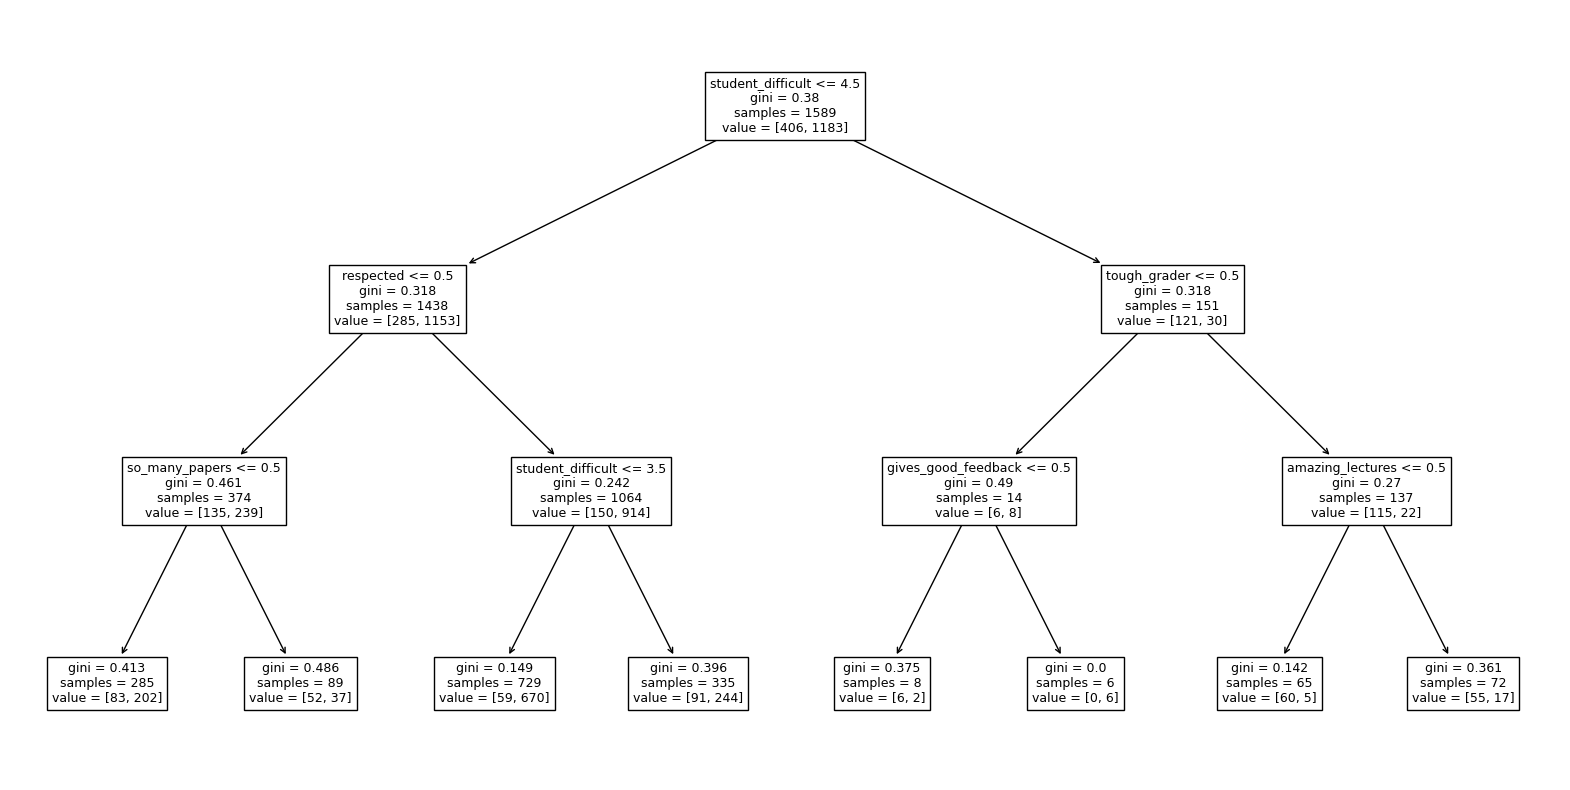

In [32]:
max_depth = 3

x_feat_list = list(df_rmp.columns[1:])

# extract data from dataframe
x = df_rmp.loc[:, x_feat_list].values
y = df_rmp.loc[:, 'would_take_agains'].values
    
# build decision tree classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# fit data
dec_tree_clf = dec_tree_clf.fit(x, y)
    
# plot figure of decision tree
# initialize empty figure (plot_tree sets text size to fill given figure
# if we resize figure afterwards text size remains too small)
plt.figure()
plt.gcf().set_size_inches(20, 10)
        
# 'plot' decision tree
tree.plot_tree(dec_tree_clf, feature_names=x_feat_list);

## Part 2.2: Predict a Professor

Predict (manually or with the `.predict()` function, your choice) if a student would take a professor again or not if:
- The student rated the professor as very difficult: `student_difficult = 5`
- The student rated the professor as not a tough grader: `tough_grader = 0`
- The student rated the professor as having amazing lectures: `amazing_lectures = 1`

**Then** discuss in a sentence or two what the gini value in the terminal node that your prediction came from means.

$\color{red}{\text{Solution:}}$

We predict the student would take the professor again, since the terminal node has 6 'Yes' and 0 'No'. This produces a gini of 0, which means there is a 0% chance of guessing incorrectly once we are in this node.

## Part 2.3: Cross Validate

Predict whether students would take a professor again using Decision Trees with a 10-fold cross validation and `max_depth = None`.

$\color{red}{\text{Solution:}}$

In [10]:
n_splits = 10 # 10-fold Cross Validation
max_depth = None

x_feat_list = list(df_rmp.columns[1:])

x = df_rmp.loc[:, x_feat_list].values
y = df_rmp.loc[:, 'would_take_agains'].values
    
# initialize k fold
skfold = StratifiedKFold(n_splits=n_splits)

# initialize decision tree
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    dec_tree_clf = dec_tree_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = dec_tree_clf.predict(x_test)

## Part 2.4: Confusion Matrix and Accuracy/Sensitivity/Specificity

Make a confusion matrix using the true `y` values and the `y_pred` values from the 10-fold cross validation in the previous part. Then, use the provided `get_acc_sens_spec()` function to calculate the accuracy, sensitivity, and specificity of the cross validated predictions from the previous part (the Decision Tree with `max_depth = None`).

In [11]:
def get_acc_sens_spec(y_true, y_pred, verbose=True):
    """ computes sensitivity & specificity (assumed binary inputs)

    Args:
        y_true (np.array): binary ground truth per trial
        y_pred (np.array): binary prediction per trial

    Returns:
        acc (float): accuracy
        sens (float): sensitivity
        spec (float): specificity
    """
    # line below stolen from sklearn confusion_matrix documentation
    tn, fp, fn, tp = confusion_matrix(y_true,
                                      y_pred).ravel()

    # compute sensitivity
    if tp + fn:
        sens = tp / (tp + fn)
    else:
        sens = np.nan

    # compute specificity
    if tn + fp:
        spec = tn / (tn + fp)
    else:
        spec = np.nan
        
    # compute acc
    acc = (tp + tn) / (tn + fp + fn + tp)

    return acc, sens, spec

$\color{red}{\text{Solution:}}$

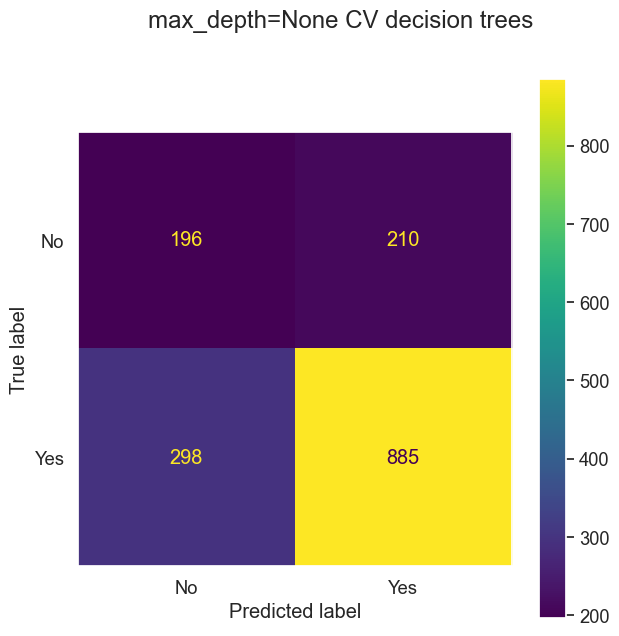

In [12]:
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))

sns.set(font_scale=1.2)
conf_mat_disp.plot()
plt.gcf().set_size_inches(7, 7)
plt.grid(False)
plt.suptitle('max_depth=None CV decision trees');

In [13]:
get_acc_sens_spec(y_true=y, y_pred=y_pred)

(0.6803020767778477, 0.7480980557903635, 0.4827586206896552)

## Part 2.5: Discuss

In a markdown cell, discuss the results from Part 2.4. In 3-4 sentences, describe (a) the performance of the decision tree and (b) what is one drawback of the single decision tree approach and how might we address it?

$\color{red}{\text{Solution:}}$

The decision tree seems to perform okay; accuracy is about 68% and sensitivity is about 75%, both reasonable, however specificity is only 47% which is not ideal; this means we have a high false positive rate. The single decision tree approach is subject to overfitting, which we can address by moving to a random forest of decision trees.

## Part 3: Random Forest (40 points; 10 points each part)

### Part 3.1: Cross Validated Random Forest

Using the same data from Part 2, fit a 10-fold cross validated Random Forest classifier of the RateMyProfessor data. Keep the defaults of `max_depth=None` and `n_estimators=100`. 

**NOTE**: You are not expected to write all the code for this problem. To save time, you may take code from the lecture notes/homework and adapt it appropriately. If you do, please be careful to make sure you are adequately adapting the code to this problem, and **MAKE SURE TO COMMENT**.

$\color{red}{\text{Solution:}}$

In [14]:
# The classifier via cross validation
n_splits = 10

x_feat_list = list(df_rmp.columns[1:])

x = df_rmp.loc[:, x_feat_list].values
y = df_rmp.loc[:, 'would_take_agains'].values

# initialize k fold
skfold = StratifiedKFold(n_splits=n_splits)

# initialize random forest
rf_clf = RandomForestClassifier()

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    rf_clf = rf_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = rf_clf.predict(x_test)

## Part 3.2: Confusion Matrix and Accuracy/Sensitivity/Specificity

Make a confusion matrix using the true `y` values and the `y_pred` values from the 10-fold cross validation in the previous part. Then, use the `get_acc_sens_spec()` function to calculate the accuracy, sensitivity, and specificity of the cross validated predictions from previous part (the Random Forest of 100 decision trees with `max_depth = None`).

$\color{red}{\text{Solution:}}$

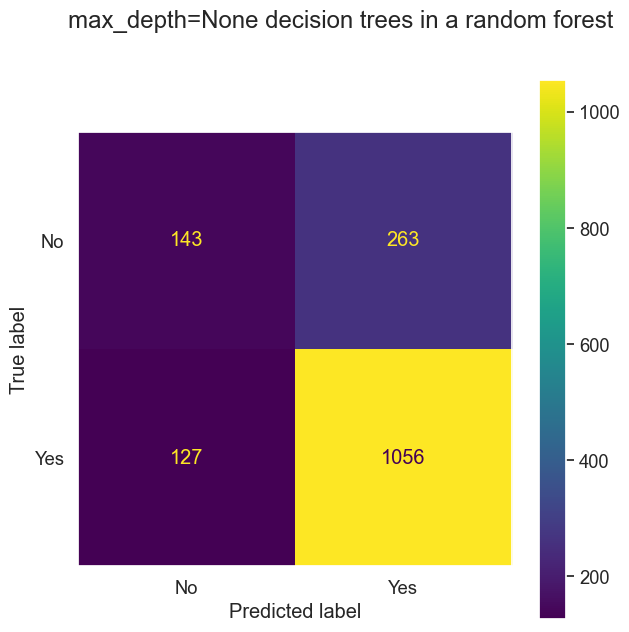

In [15]:
# build and plot confusion matrix
sns.set(font_scale=1.2)
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))
conf_mat_disp.plot()
plt.gcf().set_size_inches(7, 7)
plt.grid(False)
plt.suptitle('max_depth=None decision trees in a random forest');

In [16]:
get_acc_sens_spec(y_true=y, y_pred=y_pred)

(0.7545626179987414, 0.8926458157227388, 0.3522167487684729)

## Part 3.3: Feature Importance

Use the `plot_feat_import` function provided below to display a plot of the top **5** most important features based on the Random Forest you fit.

In [17]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        ## not sure why, but .argsort had been doing decreasing by default, but this is now increasing
        ## This will now only work if you set the limit, since I flip it around in the next if block
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[-limit:]
        feat_import = feat_import[-limit:]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

$\color{red}{\text{Solution:}}$

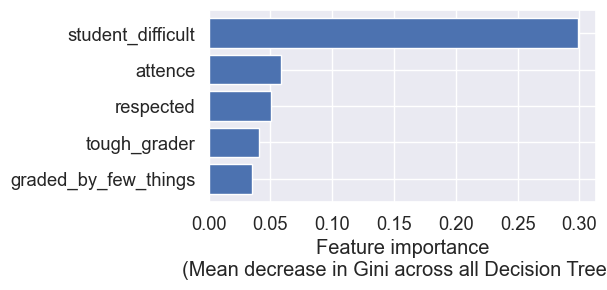

In [18]:
plot_feat_import(x_feat_list, rf_clf.feature_importances_, limit=5)

## Part 3.4: Discuss

In a markdown cell, provide a discussion (at least one paragraph) of the results of the Random Forest and their comparison to the results from the single decision tree:
- Compare the confusion matrix, accuracy, sensitivity, and specificity from the past two parts and explain what the differences mean
- Discuss the feature importance graph, what the top five important features represent, and whether it makes sense to you that they would be important in determining if a student would take a class again

$\color{red}{\text{Solution:}}$

The Random Forest shows improved accuracy and sensitivity over the single decision tree, but worse specificity. This implies the Ranodm Forest does a slightly worse job (has more) False Positives, while generally predicts better. From the feature importance graph, we see that the `student_difficult` feature is far and away the most important, indicating that how difficult a student finds a professor is the most important feature in terms of them saying they would take the class again. This makes a lot of sense, as students on the whole would likely prefer easier classes to hard classes. Attendance was the second most important feature, suggesting students may also prefer classes where they do not have to show up. Of course, these are my deductions of what makes sense; we can't actually read from this graph the direction of importance, only that these features *are* important. It could be that students actually prefer hard classes and classes that force them to attend (laughs a little, then cries).